### Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date

### Load data from yfinance library

In [2]:
ticker = 'TCS.NS'   #TCS.NS means TCS on NSE market
start_date="2010-01-01" #Starting date 
end_date=date.today()  #ending date of the stock is today
tcs_data = yf.download(ticker, start=start_date, end=end_date, progress=False) #Downloading data from yfinance library

C:\Windows\Temp\ipykernel_27316\36779570.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tcs_data = yf.download(ticker, start=start_date, end=end_date, progress=False) #Downloading data from yfinance library


In [3]:
tcs_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04,267.551270,270.131921,266.625782,268.672505,1963682
2010-01-05,267.622498,270.363332,265.735956,268.743755,2014488
2010-01-06,261.571320,267.747100,260.912817,267.622504,3349176
2010-01-07,254.292130,263.190930,253.081884,261.802708,6474892
2010-01-08,249.095169,255.751475,247.920532,254.861595,6048178


### Convert Download data into csv file for refernce

In [4]:
tcs_data.to_csv("./Data/tcs_stock_data.csv",index=False)

In [5]:
df=tcs_data.reset_index()

In [6]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551270,270.131921,266.625782,268.672505,1963682
1,2010-01-05,267.622498,270.363332,265.735956,268.743755,2014488
2,2010-01-06,261.571320,267.747100,260.912817,267.622504,3349176
3,2010-01-07,254.292130,263.190930,253.081884,261.802708,6474892
4,2010-01-08,249.095169,255.751475,247.920532,254.861595,6048178


In [7]:
df.shape

(3928, 6)

In [8]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,3928,3928.000000,3928.000000,3928.000000,3928.000000,3.928000e+03
mean,2017-12-16 19:14:03.177189376,1721.923378,1739.221405,1705.183229,1722.577309,2.743391e+06
min,2010-01-04 00:00:00,249.095169,254.823638,244.562897,250.590202,0.000000e+00
25%,2013-12-19 18:00:00,804.645157,816.578845,797.271677,805.677752,1.692779e+06
50%,2017-12-16 12:00:00,1120.146790,1126.872500,1111.992612,1118.718172,2.308395e+06
75%,2021-12-10 18:00:00,2961.724976,2988.928441,2937.460954,2965.098228,3.216511e+06
max,2025-11-28 00:00:00,4389.965332,4427.080603,4349.717095,4411.415210,8.806715e+07
std,NaN,1183.732202,1194.144454,1174.127653,1184.261877,2.159416e+06


### Plot the Trend over Years

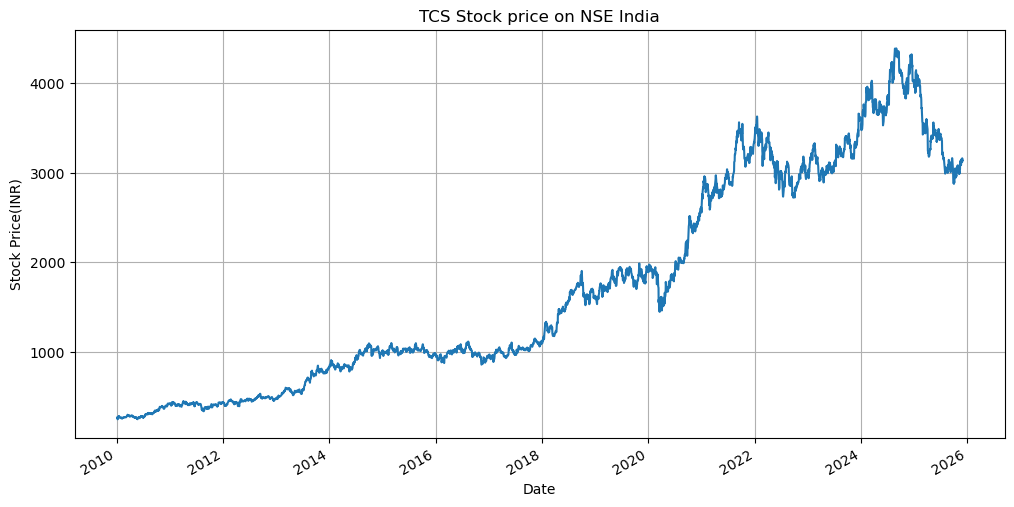

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"],df['Close'])
plt.xlabel("Date")
plt.grid(True)
plt.ylabel("Stock Price(INR)")
plt.title("TCS Stock price on NSE India")
plt.gcf().autofmt_xdate()
plt.show()
plt.savefig("./Images/TCS.png")

### Caluculate and Plot 100Day Exponential Moving Averages

In [10]:
ema_100_day = df.Close.ewm(span=100, adjust=False).mean()

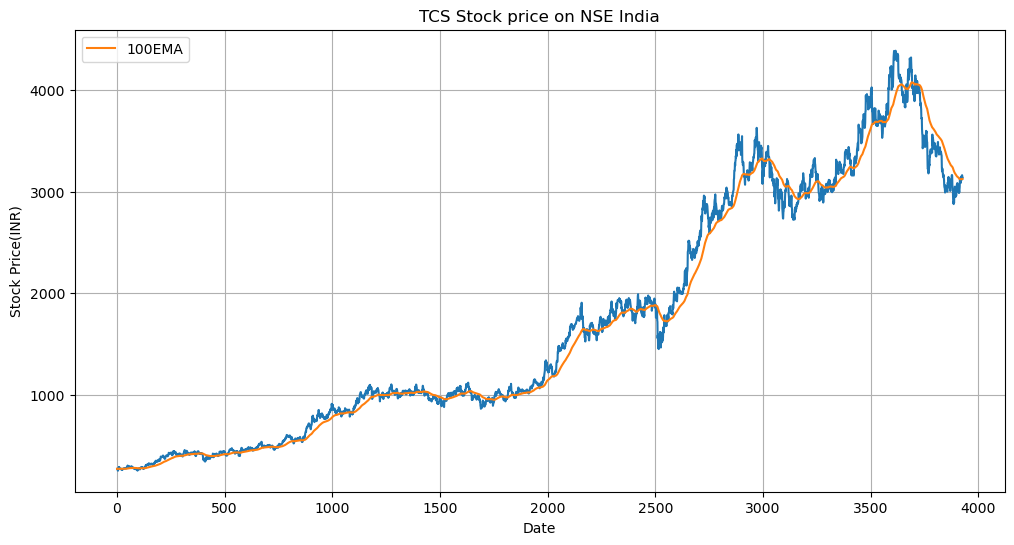

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ema_100_day,label="100EMA")
plt.xlabel("Date")
plt.grid(True)
plt.ylabel("Stock Price(INR)")
plt.legend()
plt.title("TCS Stock price on NSE India")
plt.show()
plt.savefig("./Images/TCS_EMA.png")

### Caluculate and Plot 200Day Exponential Moving Averages

In [12]:
ema_200_day = df.Close.ewm(span=200, adjust=False).mean()

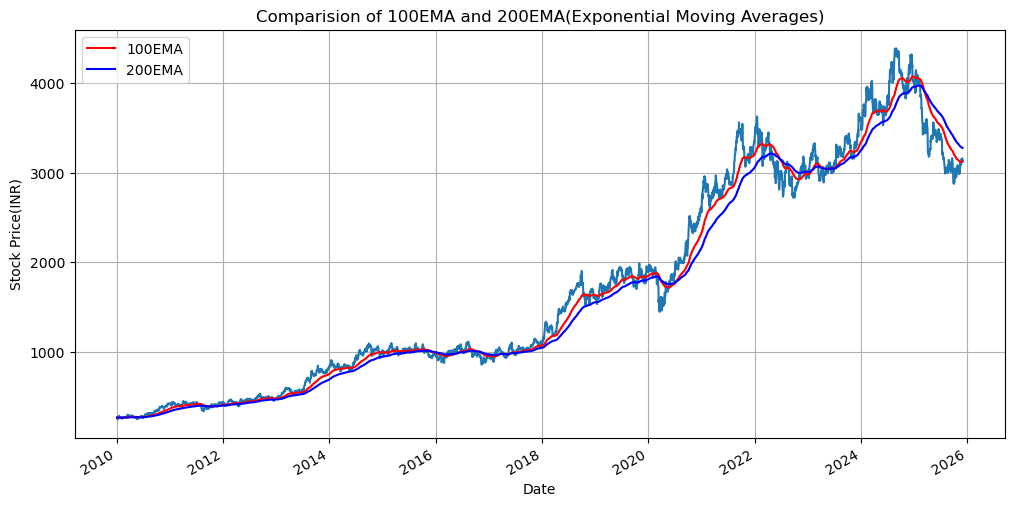

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df.Close)
plt.plot(df['Date'],ema_100_day,c="r",label="100EMA")
plt.plot(df['Date'],ema_200_day,c="b",label="200EMA")
plt.xlabel("Date")
plt.grid(True)
plt.ylabel("Stock Price(INR)")
plt.legend()
plt.title("Comparision of 100EMA and 200EMA(Exponential Moving Averages)")
plt.gcf().autofmt_xdate() 
plt.show()
plt.savefig("./Images/TCS_EMA_Cross.png")

In [14]:
tcs_data.reset_index().head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,267.551270,270.131921,266.625782,268.672505,1963682
1,2010-01-05,267.622498,270.363332,265.735956,268.743755,2014488
2,2010-01-06,261.571320,267.747100,260.912817,267.622504,3349176
3,2010-01-07,254.292130,263.190930,253.081884,261.802708,6474892
4,2010-01-08,249.095169,255.751475,247.920532,254.861595,6048178


### Split Data into Training and Testing Set without Shuffle

In [15]:
train=pd.DataFrame(tcs_data[0:int(len(tcs_data)*0.70)])
test=pd.DataFrame(tcs_data[int(len(tcs_data)*0.70):int(len(tcs_data))])

In [16]:
train.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04,267.551270,270.131921,266.625782,268.672505,1963682
2010-01-05,267.622498,270.363332,265.735956,268.743755,2014488
2010-01-06,261.571320,267.747100,260.912817,267.622504,3349176
2010-01-07,254.292130,263.190930,253.081884,261.802708,6474892
2010-01-08,249.095169,255.751475,247.920532,254.861595,6048178


In [17]:
test.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2021-02-23,2667.450928,2710.234730,2656.531267,2658.321383,3832829
2021-02-24,2638.719727,2688.171665,2614.597746,2660.111518,3774549
2021-02-25,2680.966309,2711.935173,2656.933923,2661.901536,4224073
2021-02-26,2590.565430,2660.424724,2577.766061,2649.370674,5553153
2021-03-01,2617.327637,2653.846034,2597.278432,2618.938784,3265871


### Data Normalization using MinMaxScalar

In [18]:
train_close=train.iloc[:,0:1]
test_close=test.iloc[:,0:1]

In [19]:
train_close.head()

Price,Close
Ticker,TCS.NS
Date,
2010-01-04,267.551270
2010-01-05,267.622498
2010-01-06,261.571320
2010-01-07,254.292130
2010-01-08,249.095169


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler((0,1))

In [22]:
train_close_norm=scaler.fit_transform(train_close)
train_close_norm

array([[0.00680416],
       [0.00683042],
       [0.00459955],
       ...,
       [0.91702678],
       [0.92181144],
       [0.88439179]], shape=(2749, 1))

### Create 3D Array (Number of training examples,look_back_days,output)

In [23]:
X_train=[]
y_train=[]
for i in range(100,train_close_norm.shape[0]):
    X_train.append(train_close_norm[i-100:i])
    y_train.append(train_close_norm[i,0])

In [24]:
X_train,y_train=np.array(X_train),np.array(y_train) 

In [25]:
X_train.shape  #(Number of Training examples,lookback_window,Number of Features)

(2649, 100, 1)

In [26]:
y_train.shape  #(Number of Samples)

(2649,)

### Implement LSTM NeuralNetworks

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout,LSTM,BatchNormalization
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units=50, activation='tanh', return_sequences=True,
               input_shape=(X_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='tanh', return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=80, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=100, activation='tanh', return_sequences=False)) 
model.add(Dropout(0.4))

model.add(Dense(units=1))


C:\Users\manoj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          72,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,661 (604.14 KB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 1. Define the checkpoint to save the BEST model only
checkpoint = ModelCheckpoint(
    'my_best_stock_lstm.keras',   # The filename
    monitor='val_loss',           # Monitor validation loss (or val_mape)
    save_best_only=True,          # Only save if the model improves
    mode='min',                   # Lower is better
    verbose=1
)

In [31]:
model.compile(loss="mean_squared_error",optimizer=tf.keras.optimizers.Adam(),metrics=["mean_absolute_error"])

In [32]:
history=model.fit(X_train,y_train,epochs=100,batch_size=64,callbacks=[checkpoint],shuffle=False)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - loss: 0.0036 - mean_absolute_error: 0.0440   
Epoch 2/100


C:\Users\manoj\anaconda3\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:276: UserWarning: Can save best model only with val_loss available.
  if self._should_save_model(epoch, batch, logs, filepath):


42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - loss: 0.0298 - mean_absolute_error: 0.1395
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 0.0119 - mean_absolute_error: 0.0785
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - loss: 0.0035 - mean_absolute_error: 0.0456
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 0.0068 - mean_absolute_error: 0.0647    
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0023 - mean_absolute_error: 0.0329    
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 205ms/step - loss: 0.0104 - mean_absolute_error: 0.0815    
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 201ms/step - loss: 0.0085 - mean_absolute_error: 0.0718    
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 0.0039 - mean_absolute_error: 0.0466    
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - loss: 0.0031 - mean_absolute_error: 0.0428
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - loss: 0.0020 - mean_absolute_error: 0.0301    
Epoch 

In [33]:
test_close.shape

(1179, 1)

In [34]:
past_100_day=test_close[-100:]

In [35]:
test_df=pd.DataFrame(test_close)

### Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.

In [36]:
final_df=pd.concat([past_100_day,test_df],ignore_index=True)

In [37]:
final_df.head()

Price,Close
Ticker,TCS.NS
0,3382.065430
1,3359.824463
2,3358.037109
3,3242.859131
4,3199.865723


In [38]:
X=scaler.fit_transform(final_df)

In [39]:
X.shape

(1279, 1)

### Test The Model

In [40]:
X_test=[]
y_test=[]
for i in range(100,X.shape[0]):
    X_test.append(X[i-100:i])
    y_test.append(X[i,0])

In [41]:
X_test,y_test=np.array(X_test),np.array(y_test)

In [42]:
X_test.shape

(1179, 100, 1)

In [43]:
print(f"X_test.shape:{X_test.shape}")
print(f"y_test.shape{y_test.shape}")

X_test.shape:(1179, 100, 1)
y_test.shape(1179,)


In [44]:
y_pred=model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step  


In [45]:
loss,acc=model.evaluate(X_test,y_test,batch_size=64)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0027 - mean_absolute_error: 0.0390  


In [46]:
print(f"Test loss:{loss}\n")
print(f"Test accuracy:{acc}")

Test loss:0.0026780960615724325

Test accuracy:0.03898055851459503


### Model Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [48]:
mae=mean_absolute_error(y_test,y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
r2 = r2_score(y_test,y_pred)
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage)) 
print("R2_score",r2)

Mean absolute error on test set: 9.46%
R2_score 0.9475184849552146


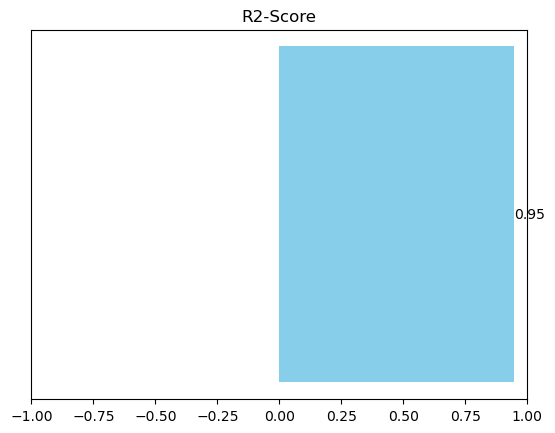

<Figure size 640x480 with 0 Axes>

In [59]:
#R2 score Plot
fig, ax = plt.subplots()
ax.barh(0,r2,color="skyblue")
ax.set_xlim([-1,1])
ax.set_yticks([])
ax.set_label("R2-Score")
ax.set_title("R2-Score")
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')
plt.show()
plt.savefig("./Images/R2-Score.png")

#### Restore The Original prices on y_test and y_pred

In [50]:
scaler.scale_

array([0.00055574])

In [51]:
scale_fatctor = 1/0.00055574

In [52]:
actual = y_test*scale_fatctor
predicted = y_pred*scale_fatctor

### Model Prediction

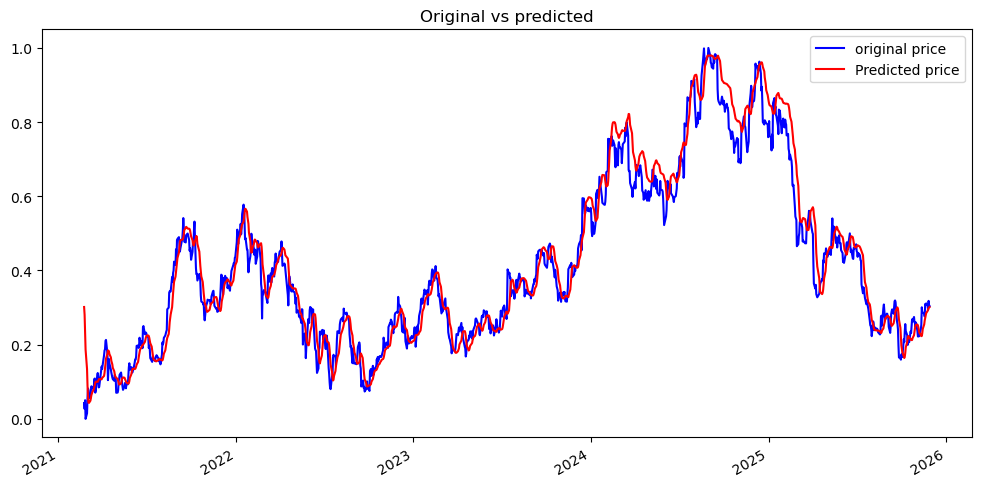

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(12,6))
plt.plot(test.index,y_test,c="b",label="original price")
plt.plot(test.index,y_pred,c="r",label="Predicted price")
plt.title("Original vs predicted")
plt.legend()
plt.gcf().autofmt_xdate() 
plt.show()
plt.savefig("./Images/original_vs_predicted.png")

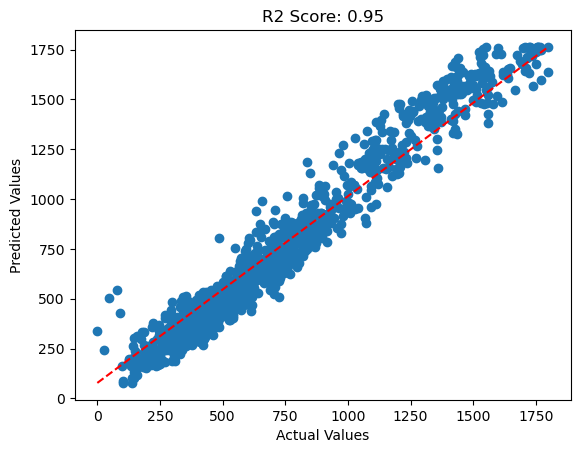

In [54]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [55]:
model.save('my_model.h5')